# TSNE visualization of amazon food review

In [0]:
from sklearn.manifold import TSNE
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer



# using the SQLite Table to read data.



In [0]:

con = sqlite3.connect('database.sqlite') 
filtered_data=pd.read_sql_query("SELECT * FROM Reviews WHERE Score!=3",con)


In [16]:
filtered_data.shape

(525814, 10)

In [17]:
filtered_data.head

<bound method NDFrame.head of             Id   ProductId          UserId  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW   
1            2  B00813GRG4  A1D87F6ZCVE5NK   
2            3  B000LQOCH0   ABXLMWJIXXAIN   
3            4  B000UA0QIQ  A395BORC6FGVXV   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T   
5            6  B006K2ZZ7K   ADT0SRK1MGOEU   
6            7  B006K2ZZ7K  A1SP2KVKFXXRU1   
7            8  B006K2ZZ7K  A3JRGQVEQN31IQ   
8            9  B000E7L2R4  A1MZYO9TZK0BBI   
9           10  B00171APVA  A21BT40VZCCYT4   
10          11  B0001PB9FE  A3HDKO7OW0QNK4   
11          12  B0009XLVG0  A2725IB4YY9JEB   
12          13  B0009XLVG0   A327PCT23YH90   
13          14  B001GVISJM  A18ECVX2RJ7HUE   
14          15  B001GVISJM  A2MUGFV2TDQ47K   
15          16  B001GVISJM  A1CZX3CP8IKQIJ   
16          17  B001GVISJM  A3KLWF6WQ5BNYO   
17          18  B001GVISJM   AFKW14U97Z6QO   
18          19  B001GVISJM  A2A9X58G2GTBLP   
19          20  B001GVISJM  A3IV7CL2C13K2U   
20  

In [0]:
def partition(X):
    if X<3:
        return 'negative'
    if X>3:
        return 'positive'

In [19]:
actualScore= filtered_data['Score']
positivenegative=actualScore.map(partition)
filtered_data['Score']=positivenegative
print(positivenegative.head())

0    positive
1    negative
2    positive
3    negative
4    positive
Name: Score, dtype: object


In [20]:
import re

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
stop = set(stopwords.words('english')) 
sno = nltk.stem.SnowballStemmer('english')

def cleanhtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'being', 'doing', 'between', 'these', 'again', "doesn't", 'ma', 'itself', 'should', 'needn', 'can', 'out', 'won', 'who', 'only', "hadn't", 'up', 'during', 'does', 'very', "should've", 'your', 'most', 'to', 'yours', 'for', 'in', "you'll", 'shouldn', 'theirs', "aren't", 'will', 'both', "you've", "needn't", 'a', "she's", 'above', "couldn't", 'all', 'hasn', 'because', 'didn', 'weren', 'against', 'its', 'while', 'couldn', 'yourselves', 'has', 'each', 'm', 'what', 'below', "you're", 'herself', 'why', 'll', 'this', 'not', 'them', 'through', 'that', 'isn', 'i', 'had', 'with', "wasn't", 'whom', 'me', "shan't", 'further', 'then', "isn't", 'and', 'more', "you'd", 'few', 'their', 'until', 'how', 'himself', 'the', 'did', 'be', 'there', 'mustn', "mustn't", 'doesn', 'other', 'hers', 'were', 'or', 'under', 'do', 'o', 'hadn', 'her', 'by', "that'll", "shouldn't", 'an', 'mightn', 'aren', 'we

In [0]:
sorted_data=filtered_data.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')


In [0]:
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)


In [0]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]


In [0]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [0]:
final['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review 
final['CleanedText']=final['CleanedText'].str.decode("utf-8")

# BOW


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:

count_vect = CountVectorizer(min_df=5,ngram_range=(1,2))
final_counts = count_vect.fit_transform(final['CleanedText'].values[0:20000])

In [0]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler(with_mean=False).fit_transform(final_counts)
final_counts=standardized_data

In [0]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import random
trunc_bow= TruncatedSVD(n_components=2)
trunc_bow_final= trunc_bow.fit_transform(final_counts)
n_samples = 19999
sample_cols = random.sample(range(1, trunc_bow_final.shape[0]), n_samples) 
sample_features = trunc_bow_final[sample_cols]
sample_class = final['Score'][sample_cols] 
sample_class = sample_class[:,np.newaxis]
model =TSNE(n_components=2,random_state=0)
sample_cols
tsne_data = model.fit_transform(sample_features)
tsne_data = np.concatenate((tsne_data, sample_class),axis=1)
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1","dim2", "label"))



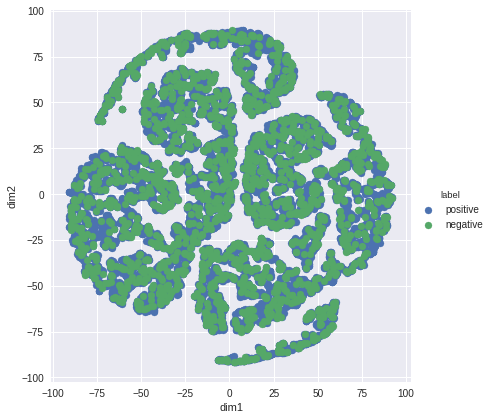

In [32]:
import seaborn as sn
sn.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,"dim1","dim2").add_legend() 
plt.show()


In [0]:
trunc_bow_final.shape

(20000, 2)

In [0]:
sample_features.shape

(19999, 2)

In [0]:
tsne_data.shape

(19999, 3)

In [0]:
sample_class.shape

OBSERVATION-


# Tf-Idf 


In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2),min_df=5)
final_tf_idf = tf_idf_vect.fit_transform(final['CleanedText'].values[0:20001])


In [79]:
final_tf_idf.get_shape()


(20001, 27253)

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


standardized_data = StandardScaler(with_mean=False).fit_transform(final_tf_idf)
final_tfidf=standardized_data

In [0]:
from sklearn.decomposition import TruncatedSVD
import random
trunc_tfidf= TruncatedSVD(n_components=2)
trunc_tfidf_final= trunc_tfidf.fit_transform(final_tf_idf)
n_samples = 19999
sample_cols = random.sample(range(1, trunc_tfidf_final.shape[0]), n_samples) 
sample_features = trunc_tfidf_final[sample_cols]
sample_class = final['Score'][sample_cols] 
sample_class = sample_class[:,np.newaxis]
model =TSNE(n_components=2,random_state=0,perplexity=30)
tsne_data = model.fit_transform(sample_features)
tsne_data = np.concatenate((tsne_data,sample_class),axis=1)
tsne_df = pd.DataFrame(data=tsne_data, columns=( "dim1","dim2","label"))


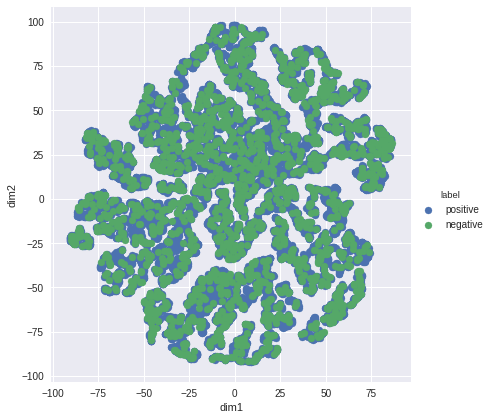

In [82]:
import seaborn as sn
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

# word 2 vec

In [0]:

i=0
list_of_sent=[]
for sent in final['CleanedText'].values[0:20000]:
    list_of_sent.append(sent.split())

In [61]:
list_of_sent[0]

['witti',
 'littl',
 'book',
 'make',
 'son',
 'laugh',
 'loud',
 'recit',
 'car',
 'drive',
 'along',
 'alway',
 'sing',
 'refrain',
 'hes',
 'learn',
 'whale',
 'india',
 'droop',
 'love',
 'new',
 'word',
 'book',
 'introduc',
 'silli',
 'classic',
 'book',
 'will',
 'bet',
 'son',
 'still',
 'abl',
 'recit',
 'memori',
 'colleg']

In [0]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)    


In [63]:
len(list_of_sent)

20000

In [64]:
w2v_model.most_similar("like")

[('aw', 0.7506529688835144),
 ('weird', 0.7278627753257751),
 ('horribl', 0.6965175271034241),
 ('nasti', 0.6893648505210876),
 ('bubblegum', 0.6853265762329102),
 ('real', 0.6733386516571045),
 ('bland', 0.6683714389801025),
 ('kind', 0.6594334244728088),
 ('acrid', 0.6587443947792053),
 ('strang', 0.6582820415496826)]

In [65]:
w2v_model.most_similar("book")

[('articl', 0.8943080306053162),
 ('link', 0.8841751217842102),
 ('video', 0.881554901599884),
 ('post', 0.8671865463256836),
 ('copi', 0.8595406413078308),
 ('report', 0.8527452945709229),
 ('advic', 0.844360888004303),
 ('question', 0.8437384963035583),
 ('wrote', 0.8408682346343994),
 ('suspicion', 0.8405642509460449)]

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

w2v_counts = w2v_model[0:2000]
standardized_data = StandardScaler(with_mean=False).fit_transform(w2v_counts)
w2v_counts=standardized_data

# AVERAGE WORD2V

In [66]:
w2v_words=list(w2v_model.wv.vocab)
sent_vectors = [];
for sent in list_of_sent:
    sent_vec = np.zeros(50)
    cnt_words =0;
    for word in sent:
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

20000
50


In [67]:
avg_vec=np.array(sent_vectors)
avg_vec.shape

(20000, 50)

In [68]:
avg_vec

array([[ 0.36056581, -0.32367865, -0.14431032, ...,  0.21612545,
         0.14090347,  0.27925599],
       [ 0.39599962, -0.07236069, -0.28957694, ...,  0.0356816 ,
         0.16553407,  0.53437812],
       [ 0.61361941, -0.4954891 ,  0.16243031, ...,  0.09629869,
         0.47564111, -0.04970616],
       ...,
       [ 0.24431243, -0.59934745,  0.18896536, ...,  0.19792746,
         0.59906827,  1.11698867],
       [ 0.25529306, -0.33319333,  0.23859675, ...,  0.48504997,
         0.60797849,  0.92721298],
       [ 0.11679881, -0.21081117, -0.36389758, ..., -0.06137068,
        -0.15442981,  0.68871788]])

In [0]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


standardized_data = StandardScaler(with_mean=False).fit_transform(avg_vec)
avg_vec=standardized_data

In [0]:
import random

n_samples = 9999
sample_cols = random.sample(range(1, avg_vec.shape[0]), n_samples) 
sample_features = avg_vec[sample_cols] 
sample_class = final['Score'][sample_cols] 
sample_class = sample_class[:,np.newaxis]
model =TSNE(n_components=2,random_state=0,perplexity=30)
tsne_data = model.fit_transform(sample_features)
tsne_data = np.concatenate((tsne_data,sample_class),axis=1)
tsne_df = pd.DataFrame(data=tsne_data, columns=( "dim1","dim2","label"))


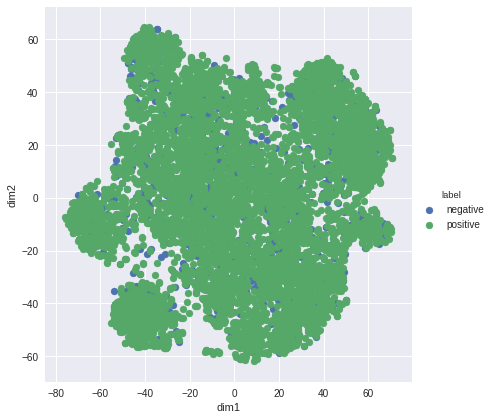

In [77]:
import seaborn as sn
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.show()

# TFIDF _ WORD 2 vec

In [72]:

import random
tf_idf_vect=TfidfVectorizer(ngram_range=(1,2))
sample_cols=random.sample(range(1,364170),20001)
tfidf_w2v= tf_idf_vect.fit_transform(final['CleanedText'].values[sample_cols])
tfidf_w2v.shape

(20001, 400510)

In [0]:
features = tf_idf_vect.get_feature_names()

In [74]:
len(features)

400510

In [75]:
features

['aaa',
 'aaa dont',
 'aaa rate',
 'aaaand',
 'aaaand theyr',
 'aaah',
 'aaah inhal',
 'aafco',
 'aafco definit',
 'aafco set',
 'aafco somewher',
 'aafco standard',
 'aafco unless',
 'aappubl',
 'aappubl org',
 'aback',
 'aback paid',
 'aback rise',
 'abalon',
 'abalon like',
 'abalon want',
 'abandon',
 'abandon buri',
 'abandon cannot',
 'abandon forego',
 'abandon keurig',
 'abandon like',
 'abandon morn',
 'abandon premium',
 'abbott',
 'abbott lab',
 'abbrevi',
 'abbrevi compani',
 'abc',
 'abc store',
 'abd',
 'abd healthi',
 'abdomen',
 'abdomen hard',
 'abdomen throat',
 'abdomin',
 'abdomin cramp',
 'abdomin discomfort',
 'abdomin exploratori',
 'abdomin pain',
 'abdomin surgeri',
 'aberr',
 'aberr bean',
 'abil',
 'abil allevi',
 'abil besid',
 'abil bite',
 'abil brew',
 'abil cope',
 'abil diet',
 'abil dog',
 'abil eat',
 'abil enjoy',
 'abil fill',
 'abil get',
 'abil good',
 'abil heal',
 'abil hold',
 'abil honey',
 'abil induc',
 'abil knaw',
 'abil make',
 'abil mimi

In [0]:
features = tf_idf_vect.get_feature_names()
w2v_words=list(w2v_model.wv.vocab)
tfidf_sent_vectors = []; 
for sent in list_of_sent:
    sent_vec = np.zeros(50) 
    weight_sum =0; 
    for word in sent:
        if ((word in w2v_words) and (word in features)):
            vec = w2v_model.wv[word]
            
            tf_idf = final_tf_idf[row ,features.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [84]:
weight_sum

16.525582572524172

In [85]:
tfidf_sent_vectors[5]

array([ 0.18098984, -0.16406852, -0.26264633,  0.31420262, -0.41959211,
       -0.00678552, -0.139759  ,  0.06251919,  0.07341975, -0.45397382,
        0.17955479, -0.04968272,  0.44038956,  0.11079337, -0.01852942,
        0.16572328,  0.16015769,  0.08785433,  0.37805454,  0.0512882 ,
       -0.30909271, -0.05523572, -0.01353778,  0.04706519,  0.22399748,
        0.21469014, -0.06452533, -0.32996669, -0.03080038, -0.16733522,
        0.82542149,  0.16996747,  0.24423919, -0.24470168, -0.61488987,
       -0.48335067, -0.02692873,  0.3771451 ,  0.05234025, -0.31301971,
       -0.21403176, -0.12151712, -0.13009747,  0.04428758, -0.10448576,
       -0.44522532,  0.36699681,  0.14455005, -0.09143977,  0.55173913])

In [0]:
from sklearn import preprocessing
tfidf_w2v_vec_norm = preprocessing.normalize(tfidf_sent_vectors)


(19999, 2) (19999, 1)
(19999, 3)


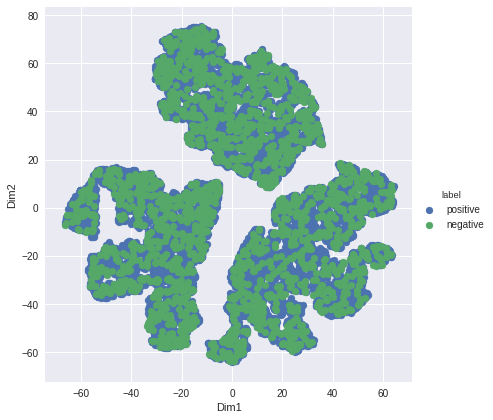

In [87]:
import random
from sklearn.decomposition import TruncatedSVD
trunc_tfidf=TruncatedSVD(n_components=2)
trunc_tfidf_w2v =trunc_tfidf.fit_transform(tfidf_w2v_vec_norm)
n_samples = 19999
sample_cols = random.sample(range(1, len(trunc_tfidf_w2v)), n_samples)
sample_features =trunc_tfidf_w2v[sample_cols]

sample_class = final['Score'][sample_cols]
sample_class = sample_class[:,np.newaxis]
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=100)
embedded_data = model.fit_transform(sample_features)
final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","label"])
sns.FacetGrid(newdf,hue="label",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.show()

# CONCLUSION
from all the tsne plots that we have got , we have concluded that they are all overlapping,so by this It looks like  data is not linearly separable
but Tsne is an approximation so we have to train this data using different models